# 生成出了50000个50x50x50孔隙度在0%至50%之间的样本，使用了孔隙度，比表面积，平均宽度，欧拉特征数作特征项。

In [1]:
import numpy as np
import cv2
import pandas as pd
import tensorflow as tf
import csv
import os
import os
from PIL import Image
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.optimizers import SGD,RMSprop,Adam
from keras.layers import Conv2D,MaxPooling2D

Using TensorFlow backend.


In [5]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def show_data(file,size):
  data = np.loadtxt(file,delimiter=",",skiprows=0)
  P=[]
  for i in range(0,len(data)):
    if data[i]==0:
        x=i%size
        y=int(i/size)%size
        z=int(i/(size*size))
        P.append([x,y,z])
  P=np.array(P)
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca(projection='3d')
  ax.scatter3D(P[:,0],P[:,1],P[:,2],c='k')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  ax.set_title('data')
  plt.show()

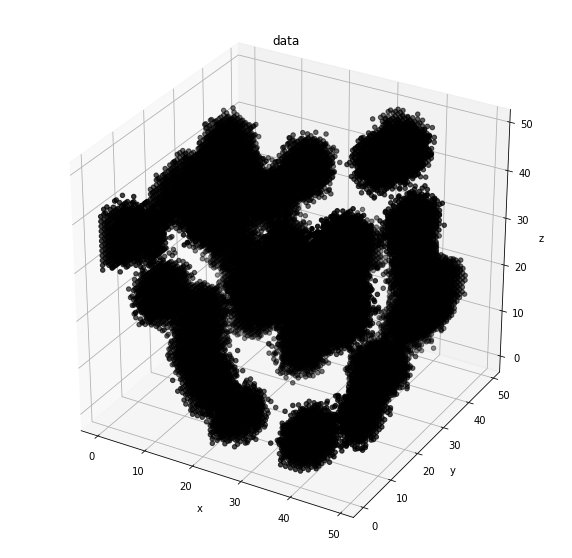

In [6]:
show_data("F:/mywork/fast_rock_sample/data70.csv",50)

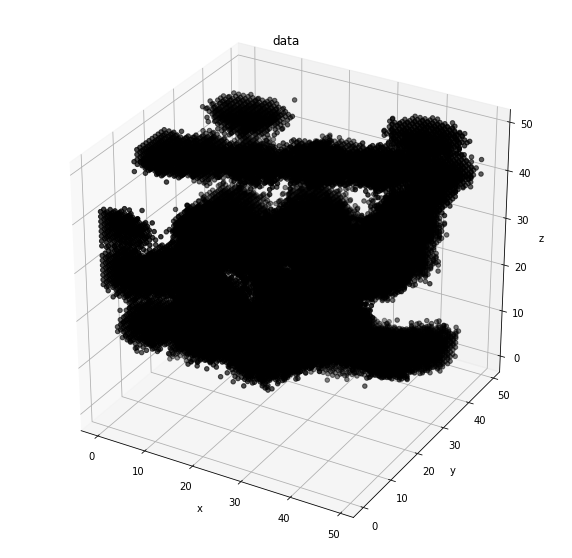

In [7]:
show_data("F:/mywork/fast_rock_sample/data17010.csv",50)

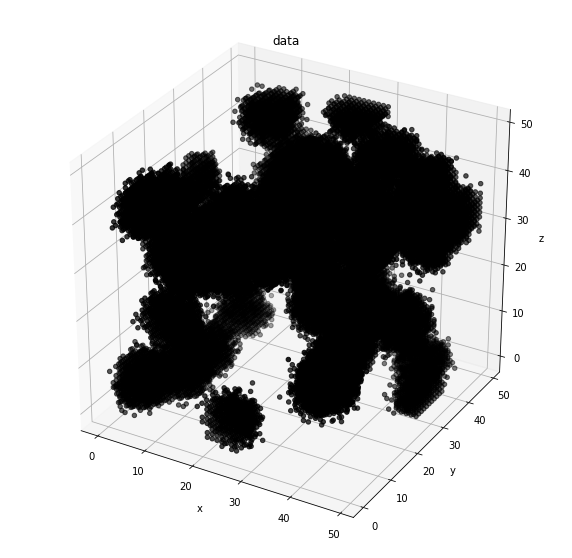

In [8]:
show_data("F:/mywork/fast_rock_sample/data37010.csv",50)

In [9]:
data = pd.read_csv("C:/Users/Administrator/Desktop/label/minkowski.csv")

In [10]:
data.describe()

,label,porosity,specificSurfaceArea,meanBreadth,eulerNumber
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.003115,0.185757,0.143494,21.607776,-57.871000
std,0.005811,0.107854,0.073535,182.486115,52.295909
min,-0.000009,0.001432,0.001020,-315.330000,-318.000000
25%,0.000013,0.096768,0.084109,-91.667000,-93.000000
50%,0.000079,0.182060,0.148470,-32.000000,-49.000000
75%,0.003670,0.266157,0.202320,61.000000,-13.000000
max,0.052059,0.524530,0.325240,1277.300000,81.000000


In [11]:
data.head()

,label,porosity,specificSurfaceArea,meanBreadth,eulerNumber
0,0.006257,0.263960,0.202720,33.000,-113
1,0.000119,0.166900,0.138840,-62.000,-59
2,0.009944,0.337970,0.246900,329.330,-114
3,0.000076,0.123310,0.113800,-173.670,-105
4,0.000010,0.043624,0.038827,-15.333,-4


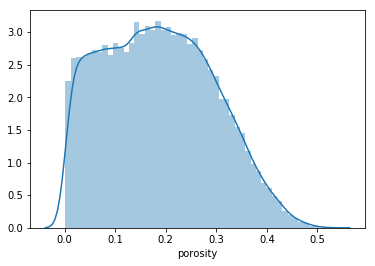

In [12]:
sns.distplot(data['porosity'])  
plt.show()

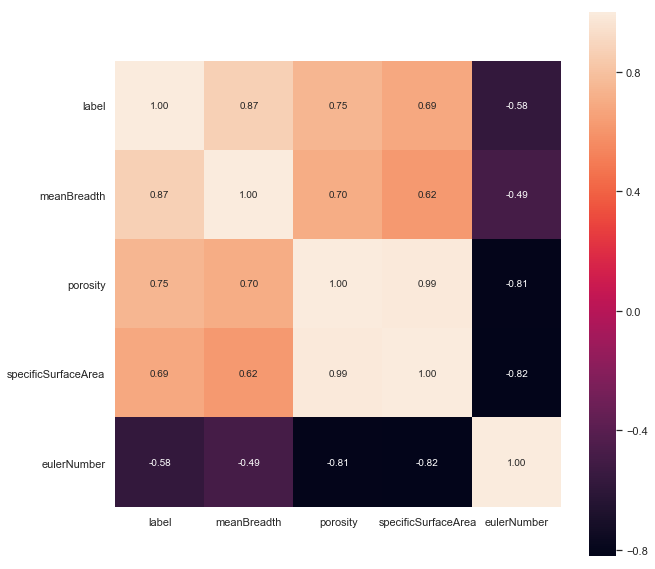

In [13]:
corrmat = data.corr()
plt.figure(figsize=(10,10))
k = 5
cols = corrmat.nlargest(k, 'label')['label'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [14]:
X=data[['porosity','specificSurfaceArea','meanBreadth','eulerNumber']]
Y=data[['label']]

In [15]:
#归一化
max_min_scaler = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))
N_X=X[:].apply(max_min_scaler)

In [16]:
model=Sequential()
model.add(Dense(4,activation='relu',input_dim=4))
#model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.add(Dense(5,activation='softmax'))
model.add(Dense(1))
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [18]:
X_train, X_test, y_train, y_test = train_test_split(N_X,Y, test_size=0.2, random_state=0)

In [19]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [20]:
early_stopping=EarlyStopping(monitor='loss',patience=10,verbose=0)
train_history=model.fit(X_train,y_train,epochs=1000,batch_size=100,verbose=1,validation_data=[X_test,y_test],callbacks=[early_stopping])

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/1000
40000/40000 [==============================] - 1s 20us/step - loss: 0.0062 - val_loss: 2.1353e-05
Epoch 2/1000
40000/40000 [==============================] - 0s 9us/step - loss: 1.8772e-05 - val_loss: 1.7494e-05
Epoch 3/1000
40000/40000 [==============================] - 0s 9us/step - loss: 1.5441e-05 - val_loss: 1.4593e-05
Epoch 4/1000
40000/40000 [==============================] - 0s 9us/step - loss: 1.3223e-05 - val_loss: 1.2699e-05
Epoch 5/1000
40000/40000 [==============================] - 0s 9us/step - loss: 1.1609e-05 - val_loss: 1.1102e-05
Epoch 6/1000
40000/40000 [==============================] - 0s 10us/step - loss: 1.0196e-05 - val_loss: 9.6732e-06
Epoch 7/1000
40000/40000 [==============================] - 0s 10us/step - loss: 8.9784e-06 - val_loss: 8.4408e-06
Epoch 8/1000
40000/40000 [==============================] - 0s 9us/step - loss: 8.0261e-06 - val_loss: 7.

In [21]:
def compute_rmse(y1, y2):
    return np.mean((y1 - y2) ** 2) ** 0.5

In [22]:
compute_rmse(np.array(model.predict(X_test)),np.array(y_test))

0.0021608251367725546

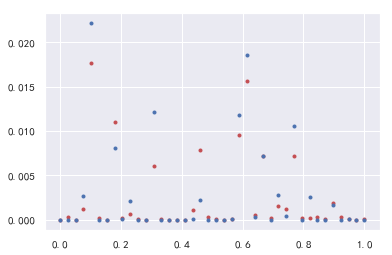

In [23]:
plt.figure()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
x = np.linspace(0,1,40)
plt.plot(x,np.array(model.predict(X_test[0:40])),'r.',x,np.array(y_test[0:40]),'b.')

# 虽然孔隙度较符合正态分布于0%-50%，但是电导率却集中在0附近。并且随着孔隙度的增大，电导率却经常性不增。比表面积和空隙度线性关系太强。

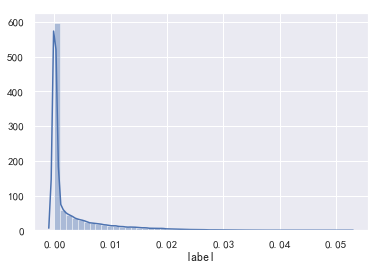

In [24]:
sns.distplot(data['label'])  
plt.show()

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


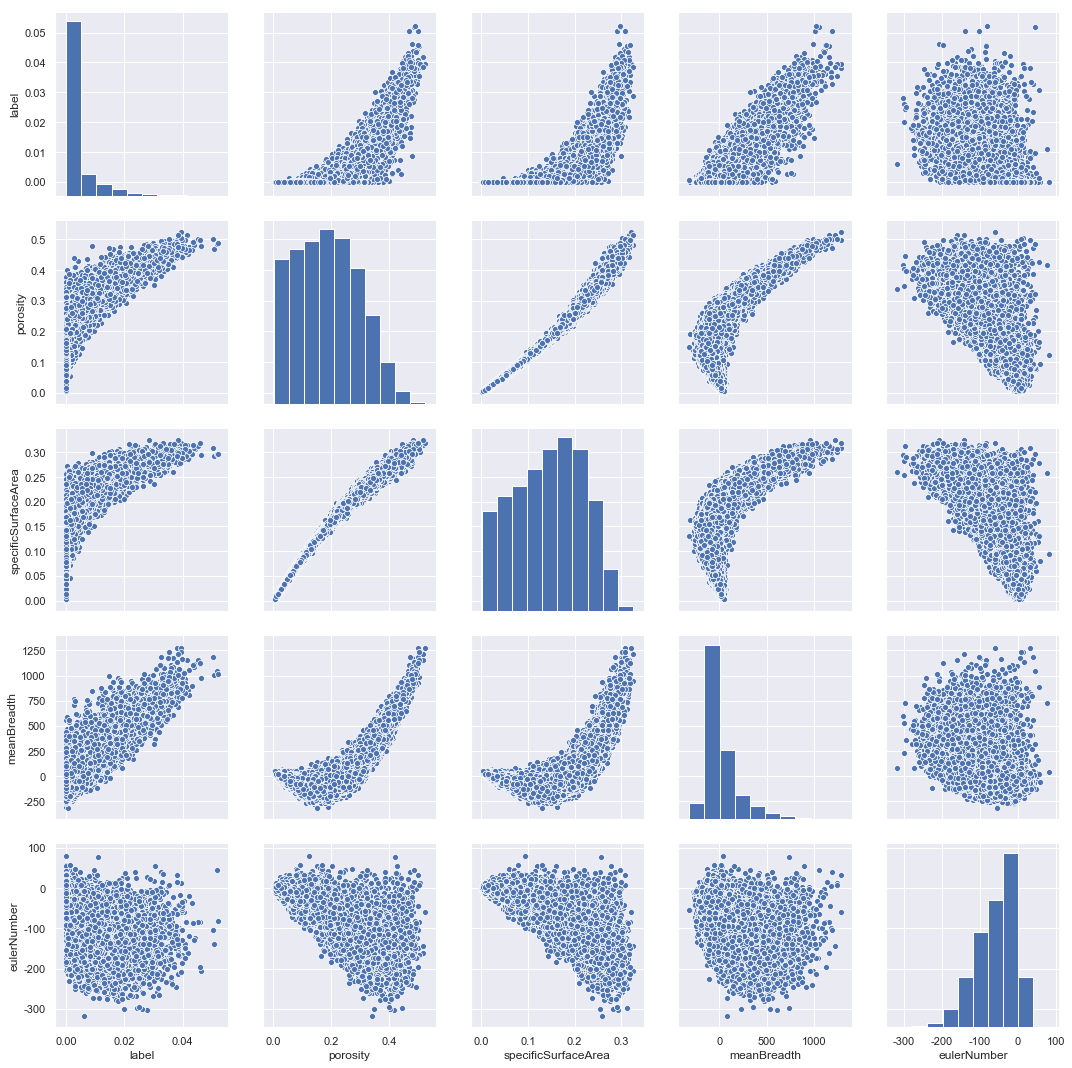

In [25]:
sns.set()
cols = ['label','porosity','specificSurfaceArea','meanBreadth','eulerNumber']
sns.pairplot(data[cols], size = 3)
plt.show();